In [1]:
import nibabel as nib
import os
import matplotlib.pyplot as plt

path = r'C:\Users\jesse\OneDrive\Desktop\Research\PD\skullstripped_files\PD'
folder = os.listdir(path)

raw_img = nib.load(os.path.join(path, folder[0])).get_fdata()
raw_img.shape

(152, 256, 256)

In [2]:
def show_slices(slices):
    fig, axes = plt.subplots(1, len(slices))
    for i, slice in enumerate(slices):
        axes[i].imshow(slice.T, cmap="gray", origin="lower")

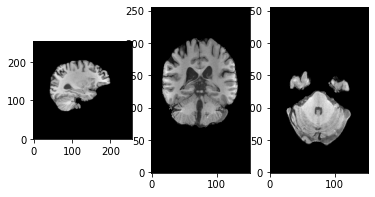

In [3]:
brain1 = raw_img[100, :, :]
brain2 = raw_img[:, 100, :]
brain3 = raw_img[:, :, 100]
show_slices([brain1, brain2, brain3])

In [4]:
import pandas as pd
import numpy as np

In [6]:
def pad(image):
    x = 2
    y = 2
    z = 2

    if x % 2 == 0:
        x1 = x2 = int(x / 2)
    else:
        x1 = int((x + 1) / 2)
        x2 = int((x - 1) / 2)

    if y % 2 == 0:
        y1 = y2 = int(y / 2)
    else:
        y1 = int((y + 1) / 2)
        y2 = int((y - 1) / 2)

    if z % 2 == 0:
        z1 = z2 = int(z / 2)
    else:
        z1 = int((z + 1) / 2)
        z2 = int((z - 1) / 2)

    image = np.pad(image, ((x1, x2), (y1, y2), (z1, z2)), 'constant')
    return image
    

def trim(image):

    row = 0
    for j in range(image.shape[0]):
        if np.all(sum(image[row, :, :]) == 0) == True:
            image = np.delete(image, row, 0)
        else:
            row += 1
        
    column = 0
    for j in range(image.shape[1]):
        if np.all(sum(image[:, column, :]) == 0) == True:
            image = np.delete(image, column, 1)
        else:
            column += 1
        
    depth = 0
    for j in range(image.shape[2]):
        if np.all(sum(image[:, :, depth]) == 0) == True:
            image = np.delete(image, depth, 2)
        else:
            depth += 1
    
    return image
    

img = []
for i in range(len(folder)):
    image = os.path.join(path, folder[i])
    image = nib.load(image)
    image = image.get_fdata()
    image = trim(image)
    image = pad(image)
    img.append(image)

(120, 176, 151)


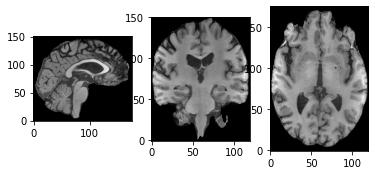

In [9]:
print(img[0].shape)
brain1 = img[0][60, :, :]
brain2 = img[0][:, 80, :]
brain3 = img[0][:, :, 75]
show_slices([brain1, brain2, brain3])

C:\Users\jesse\Anaconda3\lib\site-packages\scipy\ndimage\interpolation.py:605: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


(96, 96, 96)


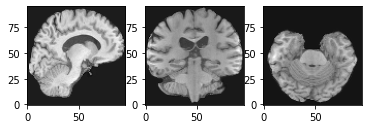

In [10]:
from scipy.ndimage import zoom

new_img = []
for i in range(len(img)):
    zoomed = zoom(img[i], (96/img[i].shape[0], 96/img[i].shape[1], 96/img[i].shape[2]))
    new_img.append(zoomed)
print(new_img[0].shape)

brain1 = new_img[0][40, :, :]
brain2 = new_img[0][:, 40, :]
brain3 = new_img[0][:, :, 30]
show_slices([brain1, brain2, brain3])

In [11]:
folder[0][0:9]

'PPMI_3001'

In [ ]:
new_folder = r'C:\Users\jesse\OneDrive\Desktop\Research\PD\preprocessed_files\PD' 

for i in range(len(new_img)):
    name = folder[i][0:9]
    preprocessed_image = nib.Nifti1Image(new_img[i], None) 
    location = os.path.join(new_folder, ('%s_preprocessed.nii' % name)
    nib.save(preprocessed_image, location)

In [ ]:
new_files = os.listdir(new_folder)

print(len(new_files))
print(len(new_img))
print(new_files)